## Analyzing Europe's Data


<img src="http://wallpoper.com/images/00/40/48/35/europe-boats_00404835.jpg" width="800px">

 **Datasets Used for Analysis**

In [1]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import folium

# for providing path
import os
print(os.listdir("../input"))

['pollution_2016.csv', 'env_satisfaction_2013.csv', 'life_satisfaction_2013.csv', 'trust_in_politics_2013.csv', 'median_income_2016.csv', 'trust_in_legal_2013.csv', 'job_satisfaction_2013.csv', 'make_ends_meet_2016.csv', 'crime_2016.csv', 'leisure_satisfaction_2013.csv', 'underemployment_2016.csv', 'close_relations_2015.csv', 'low_savings_2016.csv', 'weather.csv', 'life_expectancy_2016.csv', 'unemployment_2016.csv', 'trust_in_police_2013.csv', 'gdp_2016.csv', 'perceived_health_2016.csv', 'population_2011.csv', 'work_hours_2016.csv']


In [2]:
pollution = pd.read_csv('../input/pollution_2016.csv')
env_satisfaction = pd.read_csv('../input/env_satisfaction_2013.csv')
life_satisfaction = pd.read_csv('../input/life_satisfaction_2013.csv')
politics = pd.read_csv('../input/trust_in_politics_2013.csv')
income = pd.read_csv('../input/median_income_2016.csv')
legal = pd.read_csv('../input/trust_in_legal_2013.csv')
job_satisfaction = pd.read_csv('../input/job_satisfaction_2013.csv')
budget = pd.read_csv('../input/make_ends_meet_2016.csv')
crime = pd.read_csv('../input/crime_2016.csv')
leisure_satisfaction = pd.read_csv('../input/leisure_satisfaction_2013.csv')
underemployment = pd.read_csv('../input/underemployment_2016.csv')
close_relations = pd.read_csv('../input/close_relations_2015.csv')
low_savings = pd.read_csv('../input/low_savings_2016.csv')
weather = pd.read_csv('../input/weather.csv')
life_expectancy = pd.read_csv('../input/life_expectancy_2016.csv')
unemployment = pd.read_csv('../input/unemployment_2016.csv')
police = pd.read_csv('../input/trust_in_police_2013.csv')
gdp = pd.read_csv('../input/gdp_2016.csv')
health = pd.read_csv('../input/perceived_health_2016.csv')
population = pd.read_csv('../input/population_2011.csv')
work_hours = pd.read_csv('../input/work_hours_2016.csv')

In [3]:
# let's merge all the datasets on the country column.

x = pd.merge(pollution, env_satisfaction,
                on = 'country')
x1 = pd.merge(x, job_satisfaction,
              on = 'country')
x2 = pd.merge(x1, life_satisfaction,
              on = 'country')
x3 = pd.merge(x2, politics,
              on = 'country')
x4 = pd.merge(x3, income,
              on = 'country')
x5 = pd.merge(x4, legal,
              on = 'country')
x6 = pd.merge(x5, budget,
              on = 'country')
x7 = pd.merge(x6, crime,
              on = 'country')
x8 = pd.merge(x7, leisure_satisfaction,
              on = 'country')
x9 = pd.merge(x8, underemployment,
              on = 'country')
x10 = pd.merge(x9, close_relations,
               on = 'country')
x11 = pd.merge(x10, low_savings,
               on = 'country')
x12 = pd.merge(x11, weather,
               on = 'country')
x13 = pd.merge(x12, life_expectancy,
               on = 'country')
x14 = pd.merge(x13, unemployment,
               on = 'country')
x15 = pd.merge(x14, police,
               on = 'country')
x16 = pd.merge(x15, gdp,
               on = 'country')
x17 = pd.merge(x16, health,
               on = 'country')
x18 = pd.merge(x17, population,
               on = 'country')
data = pd.merge(x18, work_hours,
               on = 'country')

# let's drop some of the useless columns present in the dataset
data = data.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
                 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                  'Unnamed: 15', 'Unnamed: 16'], axis = 1)

data['political_trust_rating'] = data['political_trust_rating']*10
data['legal_trust_rating'] = data['legal_trust_rating']*10
data['unemp_rate'] = data['unemp_rate']*10
data['police_trust_rating'] = data['police_trust_rating']*10
data['total_pop'] = data['total_pop']/805550

# divinding the values of median income and gdp to get the values within the range of 100
# I have used the minimum and maximum values to get the normalized values between 0 and 100.
data['median_income'] = data['median_income']/287
data['gdp'] = data['gdp']/31600

# let's transpose and check the dataset
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,United Kingdom,Iceland,Norway,Switzerland,Turkey
prct_rpt_pollution,13.2,15.1,13.5,6.8,23.2,9.9,4.6,19.6,10.1,14.1,7,15.1,9.2,17.2,15.6,16.1,12.8,30.2,13.2,10.7,11.4,13.1,14.5,15.9,9.3,7.2,6.3,9,7.9,6.8,8.9,24.5
prct_env_satis_high,22.2,8.4,33.5,52.2,40.9,18.1,43.7,18.3,23.7,27.9,22.4,11,13.4,26.2,42.1,33.9,15.8,31,31.3,57.2,39.7,19.6,29.1,42.3,22.8,34.7,34.7,38.2,29.2,48.1,41.8,18.3
prct_env_satis_med,70.3,32.6,48.7,36.9,43.1,53.4,46.2,45.2,58.9,61.6,37.9,53.5,49.3,54.7,44.9,56.9,51.9,46.3,64.7,33.3,42,42.6,55.8,40.1,48.9,56.3,51,50.6,56.6,45.8,46.2,42.3
prct_env_satis_low,7.5,59,17.8,10.9,15.9,28.5,10.1,36.5,17.4,10.5,39.7,35.5,37.3,19.1,13,9.2,32.3,22.7,4,9.5,18.2,37.8,15,17.6,28.3,9,14.4,11.3,14.2,6.1,12,39.5
prct_job_satis_high,23,16.1,29.6,44.4,25,26.6,28.3,14,19.4,20,25.6,20.2,28.2,25.8,29.6,30.4,23,27.2,22.9,42.2,32,24.5,20.4,29.1,29.2,40.8,34.5,28,42.3,39.1,36.6,18.3
prct_job_satis_med,68.5,36.1,51.4,46.4,50.7,55.1,51.7,48.3,59.1,64.7,49,62.2,51.8,56.9,55.4,55.1,55.7,59.7,71.7,47.6,48.2,50.4,61.6,51.5,48.5,54.6,52.5,49.6,48,53.6,54.9,39.5
prct_job_satis_low,8.5,47.7,19,9.2,24.3,18.4,20,37.7,21.5,15.4,25.4,17.6,20,17.3,15,14.5,21.3,13.1,5.4,10.2,19.8,25.1,18,19.3,22.3,4.7,13,22.4,9.6,7.2,8.5,42.2
prct_life_satis_high,20.9,5.9,21.3,42.7,25,13.5,30.6,12.8,18.4,16.1,15,14.2,14.2,12.6,18.8,25.7,11.3,21.9,26.1,37.9,29.4,13.8,19.7,20.4,25,38.6,34.4,27.8,38.1,35.6,38.5,11.1
prct_life_satis_med,69.9,29.8,53.3,46.6,55.8,52.1,52.7,51.8,58.4,64.8,49.5,63,48.8,56.6,53.3,59.5,50.2,57.7,68.3,49.3,50.7,45.7,63.7,55.2,48.6,55.5,56.6,53.2,52.4,54.1,53.5,38.6


<img src="https://images.adsttc.com/media/images/563c/b089/e58e/ce8c/e300/0095/original/Metropolis_Madrid.gif?1446817925" width="800px">

<img src="https://images.adsttc.com/media/images/563c/ac36/e58e/ce14/7c00/0095/original/San_Pedro_Vaticano.gif?1446816819" width="800px">


**Analyzing some of the Countries**

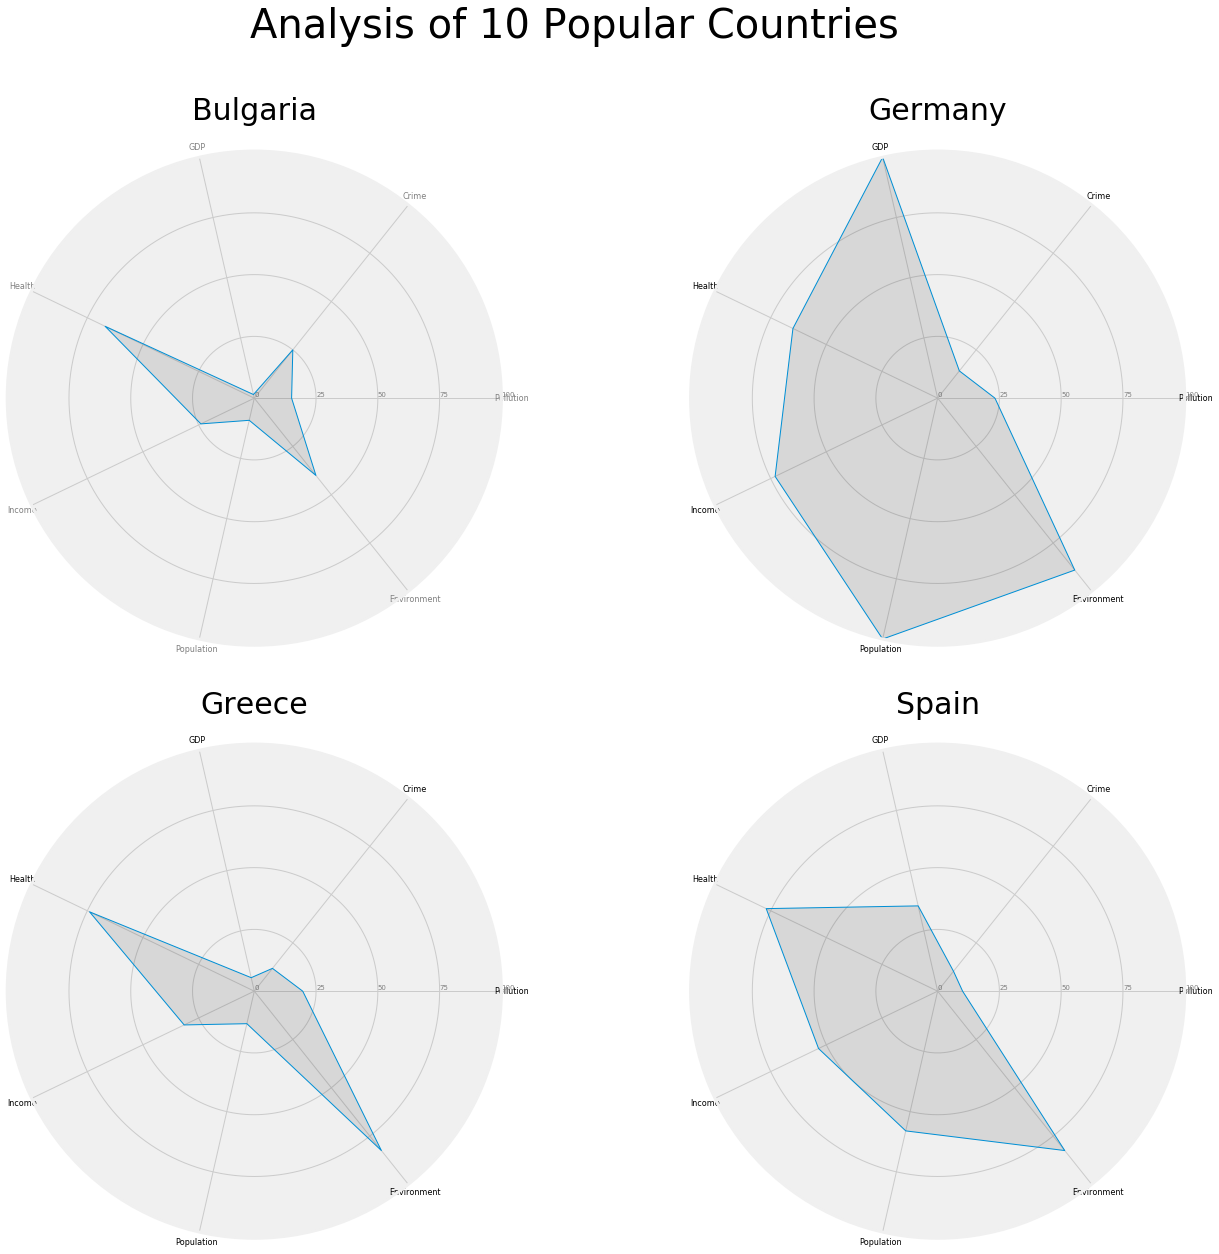

In [4]:
plt.rcParams['figure.figsize'] = (20, 20)

from math import pi

df = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [15.1, 0],
    'Crime': [25, 0],
    'GDP': [1.5, 0],
    'Health': [67, 0],
    'Income': [24, 0],
    'Population': [9.2, 0],
    'Environment': [40, 0]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(221, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Bulgaria', fontsize = 30)

df2 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [23.2, 0],
    'Crime': [14.1, 0],
    'GDP': [100, 0],
    'Health': [65, 0],
    'Income': [73, 0],
    'Population': [100, 0],
    'Environment': [89, 0]
})
# number of variable
categories2 = list(df2)[1:]
N2 = len(categories2)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N2) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Germany', fontsize = 30)
df3 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [19.6, 0],
    'Crime': [11.8, 0],
    'GDP': [5.6, 0],
    'Health': [74, 0],
    'Income': [31.5, 0],
    'Population': [13.5, 0],
    'Environment': [82.5, 0]
})
# number of variable
categories3 = list(df3)[1:]
N3 = len(categories3)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df3.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N3) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(223, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Greece', fontsize = 30)

df4 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [10.1, 0],
    'Crime': [10.3, 0],
    'GDP': [35.4, 0],
    'Health': [77, 0],
    'Income': [53.5, 0],
    'Population': [58, 0],
    'Environment': [82.5, 0]
})
# number of variable
categories4 = list(df4)[1:]
N4 = len(categories4)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df4.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N4) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(224, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.suptitle('Analysis of 10 Popular Countries', fontsize = 40)
plt.title('Spain', fontsize = 30)
plt.show()

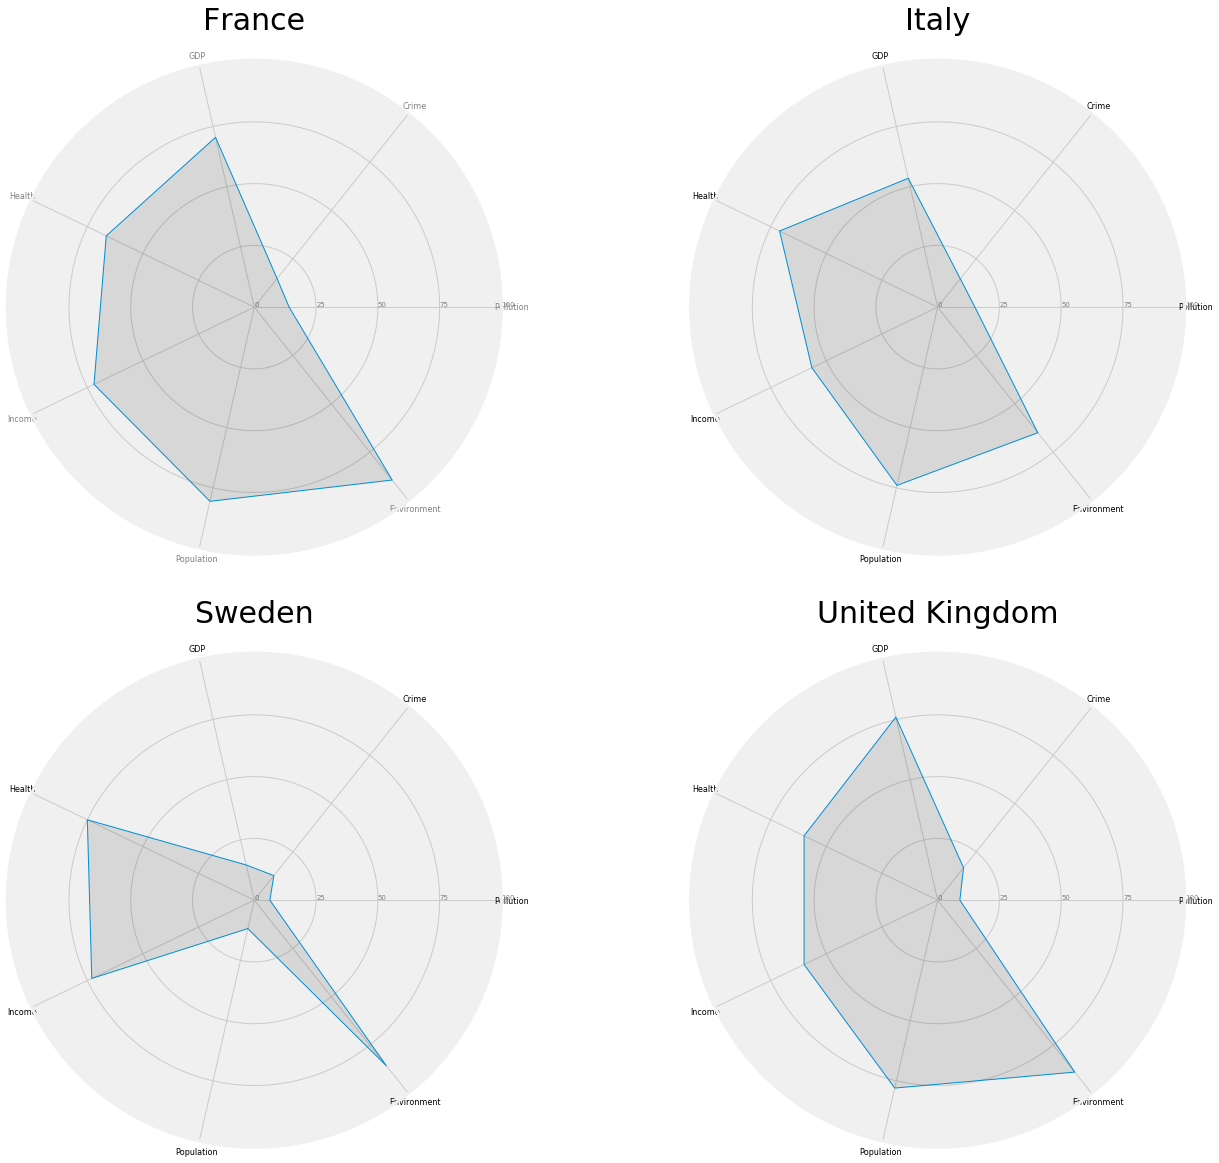

In [5]:
plt.rcParams['figure.figsize'] = (20, 20)

from math import pi

df = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [14.1, 0],
    'Crime': [14.8, 0],
    'GDP': [70.5, 0],
    'Health': [66.5, 0],
    'Income': [72, 0],
    'Population': [80.6, 0],
    'Environment': [89.5, 0]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(221, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('France', fontsize = 30)

df2 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [15.1, 0],
    'Crime': [14.7, 0],
    'GDP': [53.5, 0],
    'Health': [71, 0],
    'Income': [56.5, 0],
    'Population': [74, 0],
    'Environment': [65, 0]
})
# number of variable
categories2 = list(df2)[1:]
N2 = len(categories2)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N2) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Italy', fontsize = 30)

df3 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [6.3, 0],
    'Crime': [12.7, 0],
    'GDP': [14.6, 0],
    'Health': [75, 0],
    'Income': [73, 0],
    'Population': [11.8, 0],
    'Environment': [85.7, 0]
})
# number of variable
categories3 = list(df3)[1:]
N3 = len(categories3)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df3.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N3) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(223, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Sweden', fontsize = 30)

df4 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [9, 0],
    'Crime': [16.8, 0],
    'GDP': [76, 0],
    'Health': [60, 0],
    'Income': [60, 0],
    'Population': [78, 0],
    'Environment': [89, 0]
})
# number of variable
categories4 = list(df4)[1:]
N4 = len(categories4)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df4.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N4) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(224, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('United Kingdom', fontsize = 30)
plt.show()

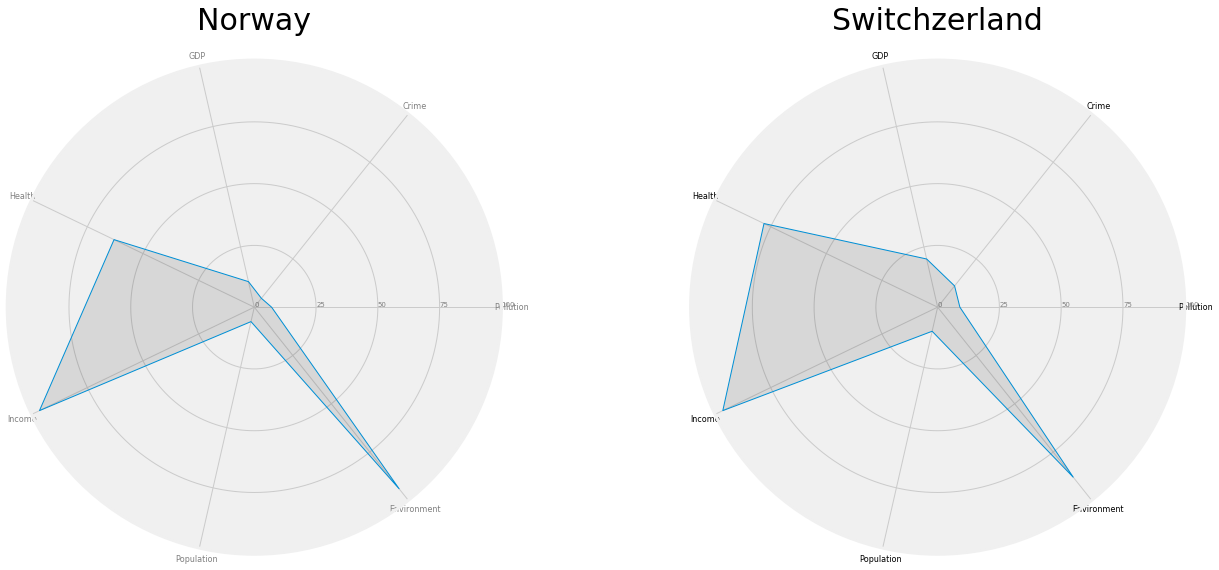

In [6]:
plt.rcParams['figure.figsize'] = (20, 20)

from math import pi

df = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [7, 0],
    'Crime': [4.6, 0],
    'GDP': [10.6, 0],
    'Health': [63, 0],
    'Income': [96.5, 0],
    'Population': [6, 0],
    'Environment': [94, 0]
})
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(221, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Norway', fontsize = 30)

df2 = pd.DataFrame({
    'group': ['A', 'B'],
    'Pollution': [9, 0],
    'Crime': [11, 0],
    'GDP': [20, 0],
    'Health': [78, 0],
    'Income': [96.5, 0],
    'Population': [10, 0],
    'Environment': [88, 0]
})
# number of variable
categories2 = list(df2)[1:]
N2 = len(categories2)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N2) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ["0","25","50","75","100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'black', alpha=0.1)
plt.title('Switchzerland', fontsize = 30)
plt.show()

> Similarly we can do for all other Countries in Europe.

## Geospatial Visualization

In [7]:
trace = [go.Choropleth(
               colorscale = 'YlOrRd',
               locationmode = 'country names',
               locations = underemployment['country'],
               text = underemployment['country'], 
               z = underemployment['med_income_underemp'],
               )]
layout = go.Layout(title = 'Under Employment in Police in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [8]:
trace = [go.Bar(
             x = underemployment['country'],
             y = underemployment['med_income_underemp'],
             name = 'Under Employment',
             marker = dict(color = 'rgb(74, 47, 44)'),
)]
layout = go.Layout(title = 'Under Employment in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [9]:
trace = [go.Choropleth(
               colorscale = 'Rainbow',
               locationmode = 'country names',
               locations = unemployment['country'],
               text = unemployment['country'], 
               z = unemployment['unemp_rate'],
               )]
layout = go.Layout(title = 'Unemployment Rate in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [10]:
trace = [go.Bar(
             x = unemployment['country'],
             y = unemployment['unemp_rate'],
             name = 'Unemployment',
             marker = dict(color = 'rgb(4, 17, 54)'),
)]
layout = go.Layout(title = 'Unemployment in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [11]:
trace = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = politics['country'],
               text = politics['country'], 
               z = politics['political_trust_rating'],
               )]
layout = go.Layout(title = 'Political Trust in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [12]:
trace = [go.Bar(
             x = politics['country'],
             y = politics['political_trust_rating'],
             name = 'Under Employment',
             marker = dict(color = 'rgb(174, 54, 144)'),
)]
layout = go.Layout(title = 'Political Satisfaction in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [13]:
trace = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = police['country'],
               text = police['country'], 
               z = police['police_trust_rating'],
               )]
layout = go.Layout(title = 'Trust in Police in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [14]:
trace = [go.Bar(
             x = police['country'],
             y = police['police_trust_rating'],
             name = 'Under Employment',
             marker = dict(color = 'rgb(7, 147, 244)'),
)]
layout = go.Layout(title = 'Satisfaction with Police in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [15]:
trace = [go.Choropleth(
               colorscale = 'Blackbody',
               locationmode = 'country names',
               locations = health['country'],
               text = health['country'], 
               z = health['prct_health_verygood'],
               )]
layout = go.Layout(title = 'Good Health in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [16]:
trace = go.Bar(
             x = health['country'],
             y = health['prct_health_verygood'],
             name = 'Very Good Health',
             marker = dict(color = 'rgb(10, 15, 20)'),
)
trace2 = go.Bar(
             x = health['country'],
             y = health['prct_health_good'],
             name = 'Good Health',
             marker = dict(color = 'rgb(170, 165, 160)'),
)
trace3 = go.Bar(
             x = health['country'],
             y = health['prct_health_fair'],
             name = 'Fair Health',
             marker = dict(color = 'rgb(100, 110, 120)'),
)
trace4 = go.Bar(
             x = health['country'],
             y = health['prct_health_bad'],
             name = 'Bad Health',
             marker = dict(color = 'rgb(70, 80, 90)'),
)
trace5 = go.Bar(
             x = health['country'],
             y = health['prct_health_verybad'],
             name = 'Very Bad Health',
             marker = dict(color = 'rgb(5, 10, 5)'),
)
data = [trace, trace2, trace3, trace4, trace5]
layout = go.Layout(title = 'Health in Europe',
                  barmode = 'relative')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [17]:
trace = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = pollution['country'],
               text = pollution['country'], 
               z = pollution['prct_rpt_pollution'],
               )]
layout = go.Layout(title = 'Avg. Pollution in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [18]:
trace = [go.Bar(
             x = pollution['country'],
             y = pollution['prct_rpt_pollution'],
             name = 'Pollution',
             marker = dict(color = 'rgb(220, 220, 220)'),
)]
layout = go.Layout(title = 'Pollution in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [19]:
trace = [go.Choropleth(
               colorscale = 'Blues',
               locationmode = 'country names',
               locations = weather['country'],
               text = weather['country'], 
               z = weather['avg_precipitation'],
               )]
layout = go.Layout(title = 'Avg. Precipitation in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [20]:
trace = go.Bar(
             x = weather['country'],
             y = weather['avg_temp'],
             name = 'Average Temp.',
             marker = dict(color = 'rgb(250, 250, 200)'),
)
trace2 = go.Bar(
             x = weather['country'],
             y = weather['avg_high_temp'],
             name = 'Avg. High Temp',
             marker = dict(color = 'rgb(20, 20, 20)'),
)
trace3 = go.Bar(
             x = weather['country'],
             y = weather['avg_low_temp'],
             name = 'Avg. Low Temp',
             marker = dict(color = 'rgb(186, 200, 250)'),
)
trace4 = go.Bar(
             x = weather['country'],
             y = weather['avg_precipitation'],
             name = 'Avg. Precipitation',
             marker = dict(color = 'rgb(220, 190, 220)'),
)
df = [trace, trace2, trace3, trace4]
layout = go.Layout(title = 'Weather in Europe',
                  barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [21]:
trace = [go.Choropleth(
               colorscale = 'Viridis',
               locationmode = 'country names',
               locations = weather['country'],
               text = weather['country'], 
               z = weather['avg_temp'],
               )]
layout = go.Layout(title = 'Avg. Temperature in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [22]:
trace = [go.Choropleth(
               colorscale = 'Reds',
               locationmode = 'country names',
               locations = low_savings['country'],
               text = low_savings['country'], 
               z = low_savings['prct_low_savings'],
               )]
layout = go.Layout(title = 'Low Savings in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [23]:
trace = [go.Bar(
             x = low_savings['country'],
             y = low_savings['prct_low_savings'],
             name = 'Low Savings',
             marker = dict(color = 'rgb(250, 200, 190)'),
)]
layout = go.Layout(title = 'Low Savings in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [24]:
trace = [go.Choropleth(
               colorscale = 'Cividis',
               locationmode = 'country names',
               locations = life_expectancy['country'],
               text = life_expectancy['country'], 
               z = life_expectancy['life_expect'],
               )]
layout = go.Layout(title = 'Life Expectancy in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [25]:
trace = [go.Bar(
             x = life_expectancy['country'],
             y = life_expectancy['life_expect'],
             name = 'Life Expectancy',
             marker = dict(color = 'rgb(190, 220, 250)'),
)]
layout = go.Layout(title = 'Life Expectancy in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [26]:
trace = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = leisure_satisfaction['country'],
               text = leisure_satisfaction['country'], 
               z = leisure_satisfaction['prct_leisure_satis_high'],
               )]
layout = go.Layout(title = 'High Leisure Satisfaction in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [27]:
trace = go.Bar(
             x = leisure_satisfaction['country'],
             y = leisure_satisfaction['prct_leisure_satis_high'],
             name = 'High Satisfaction',
             marker = dict(color = 'rgb(240, 240, 240)'),
)
trace2 = go.Bar(
             x = leisure_satisfaction['country'],
             y = leisure_satisfaction['prct_leisure_satis_med'],
             name = 'Medium Satisfaction',
             marker = dict(color = 'rgb(90, 30, 40)'),
)
trace3 = go.Bar(
             x = leisure_satisfaction['country'],
             y = leisure_satisfaction['prct_leisure_satis_low'],
             name = 'Low Satisfaction',
             marker = dict(color = 'rgb(138, 208, 138)'),
)

df = [trace, trace2, trace3]
layout = go.Layout(title = 'Leisure Satisfaction in Europe',
                  barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [28]:
trace = [go.Choropleth(
               colorscale = 'Rainbow',
               locationmode = 'country names',
               locations = job_satisfaction['country'],
               text = job_satisfaction['country'], 
               z = job_satisfaction['prct_job_satis_high'],
               )]
layout = go.Layout(title = 'High Job Satisfaction in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [29]:
trace = go.Bar(
             x = job_satisfaction['country'],
             y = job_satisfaction['prct_job_satis_high'],
             name = 'job_satisfaction',
             marker = dict(color = 'orange'),
)
trace2 = go.Bar(
             x = job_satisfaction['country'],
             y = job_satisfaction['prct_job_satis_med'],
             name = 'job_satisfaction',
             marker = dict(color = 'lightgreen'),
)
trace3 = go.Bar(
             x = job_satisfaction['country'],
             y = job_satisfaction['prct_job_satis_low'],
             name = 'job_satisfaction',
             marker = dict(color = 'pink'),
)
df = [trace, trace2, trace3]
layout = go.Layout(title = 'Job Satisfaction in Europe',
                   barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [30]:
trace = [go.Choropleth(
               colorscale = 'Greys',
               locationmode = 'country names',
               locations = gdp['country'],
               text = gdp['country'], 
               z = gdp['gdp'],
               )]
layout = go.Layout(title = 'GDP in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [31]:
trace = [go.Bar(
             x = gdp['country'],
             y = gdp['gdp'],
             name = 'GDP',
             marker = dict(color = 'rgb(96, 76, 56)'),
)]
layout = go.Layout(title = 'GDP in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [32]:
trace = [go.Choropleth(
               colorscale = 'Blackbody',
               locationmode = 'country names',
               locations = crime['country'],
               text = crime['country'], 
               z = crime['prct_rpt_crime'],
               )]

layout = go.Layout(title = '%age of Reported Crime in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [33]:
trace = [go.Bar(
             x = crime['country'],
             y = crime['prct_rpt_crime'],
             name = 'Crime',
             marker = dict(color = 'rgb(90, 20, 50)'),
)]
layout = go.Layout(title = 'Crime in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [34]:
trace = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = close_relations['country'],
               text = close_relations['country'], 
               z = close_relations['prct_close_relat'],
               )]

layout = go.Layout(title = '%age of Close Relations in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [35]:
trace = [go.Bar(
             x = close_relations['country'],
             y = close_relations['prct_close_relat'],
             name = 'Close Relations',
             marker = dict(color = 'rgb(90, 120, 50)'),
)]
layout = go.Layout(title = 'Close Relations in Europe')
fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [36]:
trace = [go.Choropleth(
               colorscale = 'Jet',
               locationmode = 'country names',
               locations = population['country'],
               text = population['country'], 
               z = population['prct_yng_adt_pop'],
               )]

layout = go.Layout(title = '%age of Young population in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,))

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

In [37]:
trace = go.Bar(
             x = life_expectancy['country'],
             y = life_expectancy['life_expect'],
             name = 'Population',
             marker = dict(color = 'rgb(8, 19, 20)'),
)
trace = go.Bar(
             x = life_expectancy['country'],
             y = life_expectancy['life_expect'],
             name = 'Young Population',
             marker = dict(color = 'rgb(135, 135, 135)'),
)
df = [trace, trace2]

layout = go.Layout(title = 'Population in Europe',
                  barmode = 'relative')
fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [38]:

trace = [go.Choropleth(
               colorscale = 'YlOrRd',
               locationmode = 'country names',
               locations = population['country'],
               text = population['country'], 
               z = population['total_pop'],
               )]

layout = go.Layout(title = 'population in European Countries',
                  geo = go.layout.Geo(
                       scope = 'europe',
                       showcountries = True,)
                  )

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

### Thanks for reading the kernel, please, stay tuned there is more to come.